<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-0.7648, -0.6026, -0.7641, -1.2515, -0.8373],
       [ 0.    ,  1.0158,  0.0418,  0.5371,  0.305 ],
       [ 0.    ,  0.    ,  0.4871, -0.0322, -0.3485],
       [ 0.    ,  0.    ,  0.    , -0.3152, -0.1098],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0944]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [5]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        x = np.array(A[:,j])
        V= x.copy()

        for k in range(j):
            q = Q[:,k]
            V-= (q.T @ x) * q
        norm = np.linalg.norm(V)
        Q[:,j] = V / norm

    for i in range(m):
        for j in range(i,n):
            R[i,j] = Q[:,i].T @ A[:,j].T
    ##Your Code ends here
    return Q, R

In [6]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [7]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [8]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [9]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
        for k in range(j+1,n):
            q = Q[:,j]
            R[j,k] = np.matmul(q.T,V[:,k])
            V[:,k] = V[:,k] - R[j,k] * q
    ##Your Code ends here
    return Q, R

In [10]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [11]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [13]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)


In [14]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

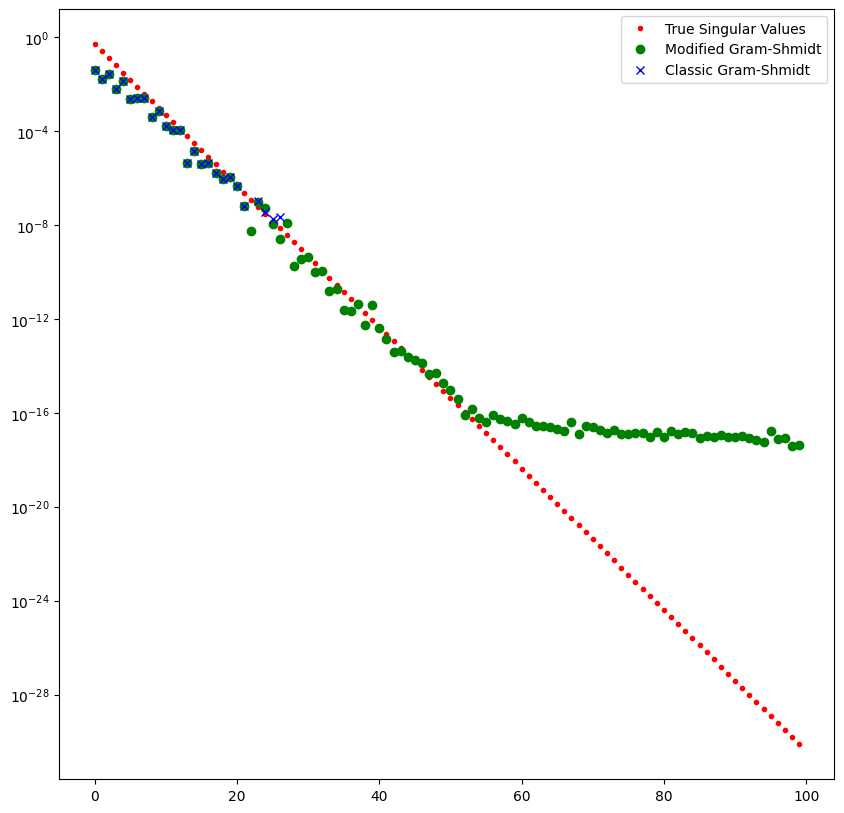

In [15]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [16]:
##Your Code start here
def eigValues_QR (A):
    A_k = A.copy()
    for i in range(1,101):
        Q_k , R_k = cgs(A_k)
        A_k = R_k @ Q_k
        if i in [1,5,10,20,100]:
            print('eig values of iteration Number '+str(i)+ ' : ',np.sort(np.diag(A_k)))
##Your Code ends here

In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
eigValues_QR(A)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
eig values of iteration Number 1 :  [0. 2. 2. 3.]
eig values of iteration Number 5 :  [-0.247   1.4541  2.7929  3.    ]
eig values of iteration Number 10 :  [-0.247   1.4451  2.8019  3.    ]
eig values of iteration Number 20 :  [-0.247   1.445   2.8019  3.    ]
eig values of iteration Number 100 :  [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

In [18]:
import cv2
import numpy as np

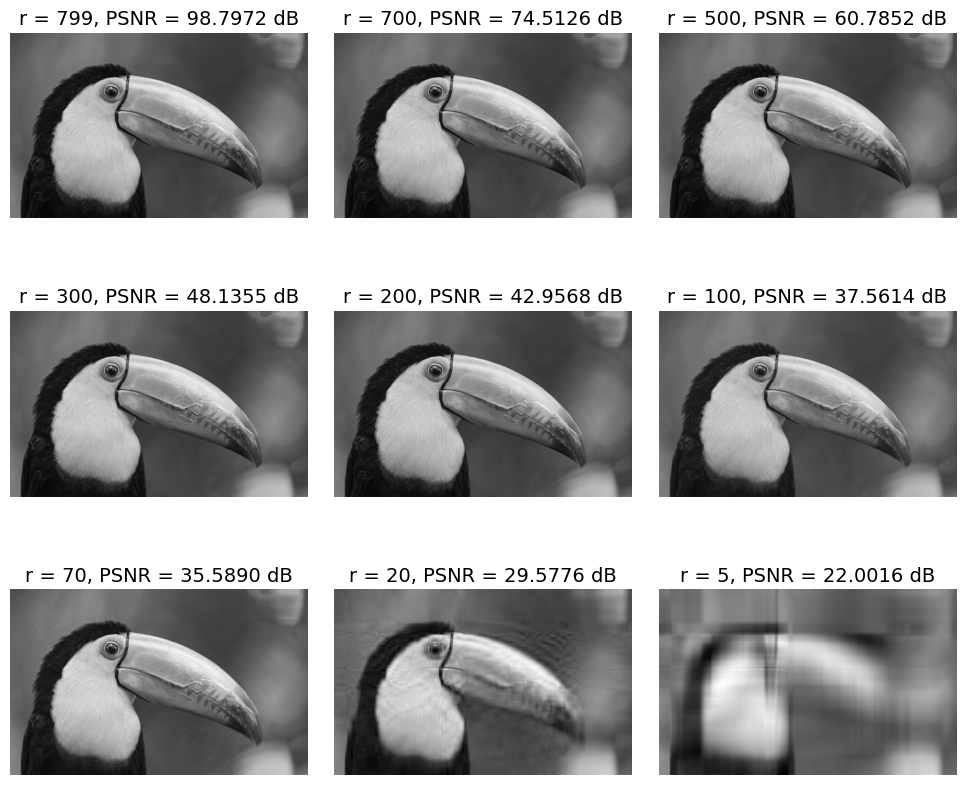

In [19]:
##Your Code start here
# Load the image in grayscale
image = np.array(cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE))
m, n = image.shape

# Perform Singular Value Decomposition (SVD)
U, eign, V = np.linalg.svd(image)

# Create a figure to plot the results
fig = plt.figure(figsize=(10, 9))

# Iterate over different values of r for compression
for index, r in enumerate([799, 700, 500, 300, 200, 100, 70 , 20 ,5]):
    # Create a sigma matrix with only r largest singular values
    sigma = np.eye(m, n) @ np.diag(np.append(eign[:r], np.zeros(n - r)))

    # Reconstruct the image using the truncated singular values
    reconstruct = U @ sigma @ V

    # Calculate the difference between original and reconstructed image
    diff = np.array(reconstruct - image, dtype=np.float64)

    # Calculate PSNR
    PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))

    # Plot the reconstructed image with its corresponding PSNR value
    plt.subplot(331 + index)
    plt.imshow(reconstruct, cmap='gray')
    plt.title('r = {}, PSNR = {:.4f} dB'.format(r, PSNR), fontsize=14)
    plt.axis('off')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()
##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


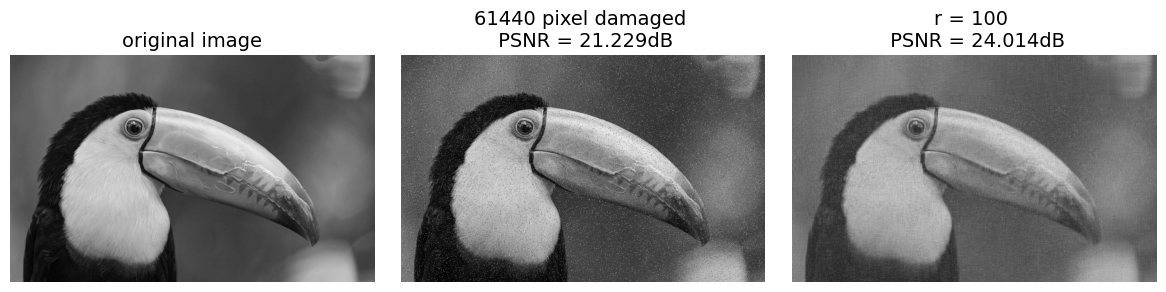

In [20]:
##Your Code start here
def apply_salt_and_pepper_noise(image, salt_paper_noise_pixel=0.02):
    noisy_image = image.copy()
    m, n = noisy_image.shape
    num_pixels = int(salt_paper_noise_pixel * m * n)

    for _ in range(num_pixels):
        row_random = np.random.randint(m, size=2)
        column_random = np.random.randint(n, size=2)
        noisy_image[row_random[0], column_random[0]] = 0
        noisy_image[row_random[1], column_random[1]] = 255

    return noisy_image

def calculate_PSNR(image1, image2):
    diff = np.array(image1 - image2, dtype=np.float64)
    mse = np.sum(diff ** 2) / (image1.shape[0] * image1.shape[1])
    psnr = 20 * np.log10(255) - 10 * np.log10(mse)
    return psnr

def reconstruct_image(image, r=100):
    U, eign, V = np.linalg.svd(image)
    sigma = np.eye(image.shape[0], image.shape[1]) @ np.diag(np.append(eign[:r], np.array([0] * (image.shape[1] - r))))
    recons_image = U @ sigma @ V
    return recons_image

# Assuming 'image' is defined earlier

fig = plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, 'gray')
plt.axis('off')
plt.title('original image', fontsize=14)

salt_paper_noise_image = apply_salt_and_pepper_noise(image)
PSNR_salt_paper = calculate_PSNR(image, salt_paper_noise_image)

plt.subplot(132)
plt.imshow(salt_paper_noise_image, cmap='gray')
plt.title('{} pixel damaged \n PSNR = {:.3f}dB'.format(int(0.03 * image.shape[0] * image.shape[1] * 2), PSNR_salt_paper), fontsize=14)
plt.axis('off')

salt_paper_noise_recons = reconstruct_image(salt_paper_noise_image)
PSNR_recons = calculate_PSNR(image, salt_paper_noise_recons)

plt.subplot(133)
plt.imshow(salt_paper_noise_recons, cmap='gray')
plt.title('r = {} \n PSNR = {:.3f}dB'.format(100, PSNR_recons), fontsize=14)
plt.axis('off')

fig.tight_layout()
plt.show()

##Your Code ends here

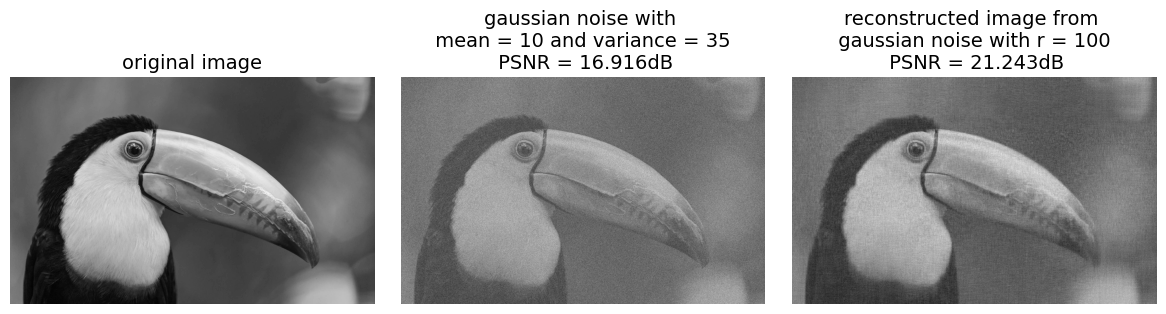

In [21]:
def add_gaussian_noise(image, mean=15, variance=20):
    noise = np.random.normal(mean, variance, image.shape)
    noisy_image = image + noise
    return noisy_image

def reconstruct_image(image, r=60):
    U, eign, V = np.linalg.svd(image)
    sigma = np.eye(image.shape[0], image.shape[1]) @ np.diag(np.append(eign[:r], np.array([0] * (image.shape[1] - r))))
    recons_image = U @ sigma @ V
    return recons_image

# Assuming 'image' is defined earlier

fig = plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, 'gray')
plt.axis('off')
plt.title('original image', fontsize=14)

mean, var = 10, 35
gauss_noise_image = add_gaussian_noise(image, mean, var)
PSNR_gaussian = calculate_PSNR(image, gauss_noise_image)

plt.subplot(132)
plt.imshow(gauss_noise_image, cmap='gray')
plt.title('gaussian noise with \n mean = {} and variance = {} \n PSNR = {:.3f}dB'.format(mean, var, PSNR_gaussian), fontsize=14)
plt.axis('off')

plt.subplot(133)
r = 100
gauss_noise_recons = reconstruct_image(gauss_noise_image, r)
PSNR_recons = calculate_PSNR(image, gauss_noise_recons)

plt.imshow(gauss_noise_recons, cmap='gray')
plt.title('reconstructed image from \n gaussian noise with r = {} \n PSNR = {:.3f}dB'.format(r, PSNR_recons), fontsize=14)
plt.axis('off')

fig.tight_layout()
plt.show()



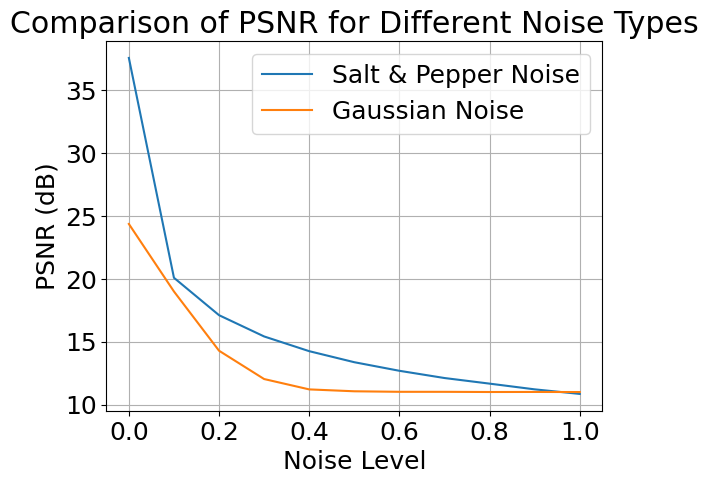

In [22]:
def add_salt_pepper_noise(image, noise_amount):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape
    num_salt = np.ceil(noise_amount * image.size * 0.5)
    salt_coords = np.random.choice(row*col, int(num_salt), replace=False)
    noisy_image.ravel()[salt_coords] = 255

    num_pepper = np.ceil(noise_amount * image.size * 0.5)
    pepper_coords = np.random.choice(row*col, int(num_pepper), replace=False)
    noisy_image.ravel()[pepper_coords] = 0

    return noisy_image

def add_gaussian_noise(image, mean=15, std_dev=20):
    noisy_image = np.copy(image)
    row, col = noisy_image.shape
    gauss = np.random.normal(mean, std_dev, (row, col))
    noisy_image += gauss.astype(np.uint8)
    return noisy_image

def svd_denoising(noisy_image, r):
    U, S, V = np.linalg.svd(noisy_image)
    U_truncated = U[:, :r]
    S_truncated = np.diag(S[:r])
    V_truncated = V[:r, :]
    reconstructed_image = np.dot(U_truncated, np.dot(S_truncated, V_truncated))
    return reconstructed_image

# Load original image with cv2
original_image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for comparison
noise_levels = np.linspace(0, 1, 11)  # Noise levels from 0 to 1
r = 100  # Rank for SVD denoising

# Lists to store PSNR values for both noise types
psnr_salt_pepper = []
psnr_gaussian = []

# Generate PSNR values for different noise levels
for noise_level in noise_levels:
    # Add salt and pepper noise to original image
    salt_pepper_noise_image = add_salt_pepper_noise(original_image, noise_level)

    # Add Gaussian noise to original image
    gaussian_noise_image = add_gaussian_noise(original_image, std_dev=noise_level*255)

    # Denoise images using SVD
    denoised_salt_pepper_image = svd_denoising(salt_pepper_noise_image, r)
    denoised_gaussian_image = svd_denoising(gaussian_noise_image, r)

    # Calculate PSNR for denoised images
    psnr_salt_pepper.append(calculate_PSNR(original_image, denoised_salt_pepper_image))
    psnr_gaussian.append(calculate_PSNR(original_image, denoised_gaussian_image))

# Plotting the results
plt.plot(noise_levels, psnr_salt_pepper, label='Salt & Pepper Noise')
plt.plot(noise_levels, psnr_gaussian, label='Gaussian Noise')
plt.xlabel('Noise Level')
plt.ylabel('PSNR (dB)')
plt.title('Comparison of PSNR for Different Noise Types')
plt.legend()
plt.grid(True)
plt.show()

Gaussian noise is more effective

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [24]:
Datapoint = pd.read_csv('Datapoint.csv',header=None)

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

We can use this components as a principal components (those that are not linear have less correlation)

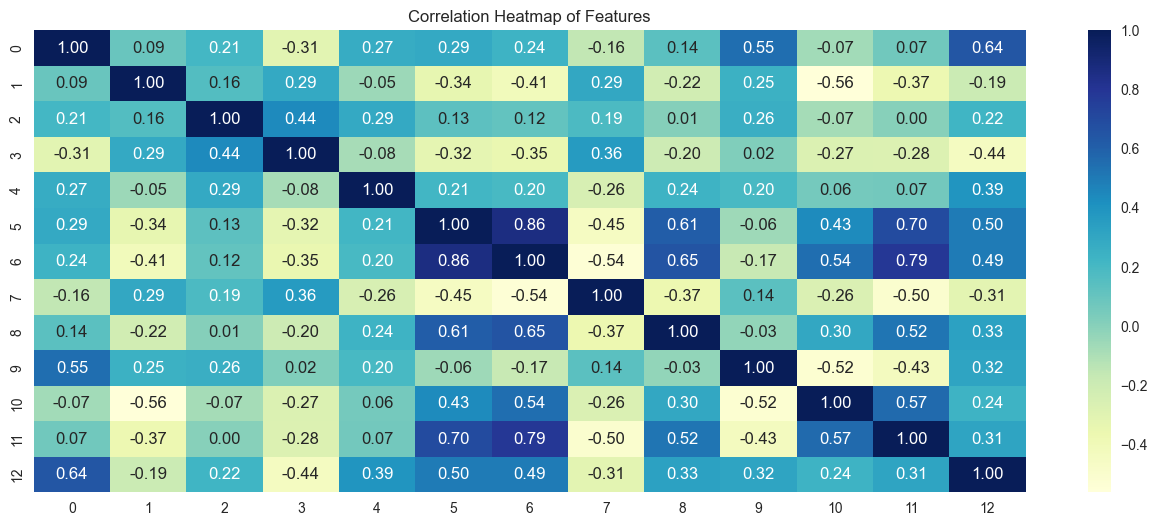

In [25]:
##Your Code start here
# Calculate correlation matrix
corr_matrix = Datapoint.corr()

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [26]:
Datapoint.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

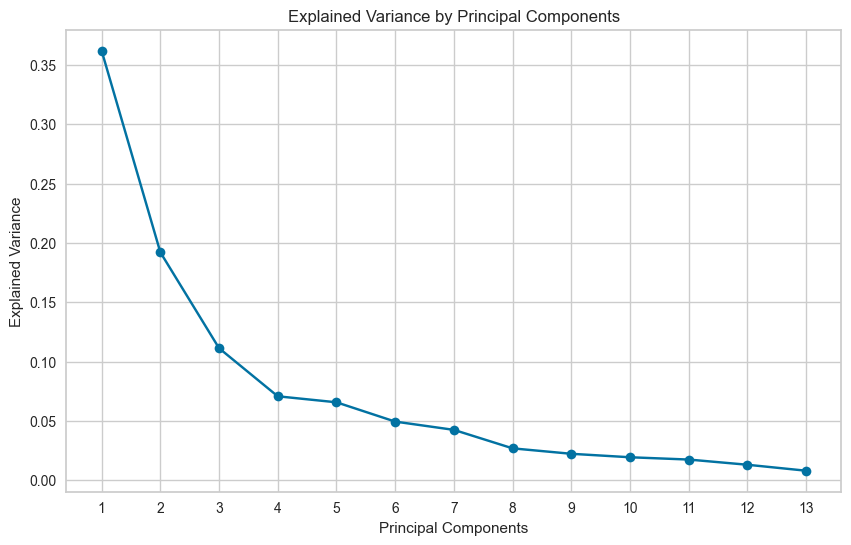

In [27]:
##Your Code start here
df1 = Datapoint.copy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Plot explained variance by each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [28]:
# Step 1: Standardize the data
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized_data = (data - mean) / std_dev
    return standardized_data, mean, std_dev

standardized_data, mean, std_dev = standardize_data(df1)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvectors based on their corresponding eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the top k eigenvectors to form the principal components
num_principal_components = 3  
principal_components = sorted_eigenvectors[:, :num_principal_components]

# Step 6: Transform the original data onto the new feature subspace defined by the selected k eigenvectors
reduced_data1 = np.dot(standardized_data, principal_components)

# Convert reduced_data to DataFrame for further analysis if needed
reduced_df1 = pd.DataFrame(reduced_data1, columns=[f'PC{i+1}' for i in range(num_principal_components)])
reduced_array1 = reduced_df1.values
#PrincipalComponents

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

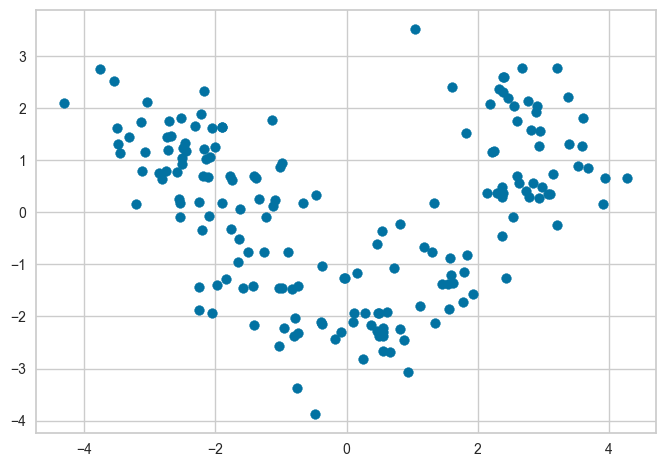

In [29]:
##Your Code start here
plt.scatter(reduced_array1[:,0],reduced_array1[:,1])
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.

MinMaxScaler scales the data to a fixed range, typically between -1 and 1. On the other hand, StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1.


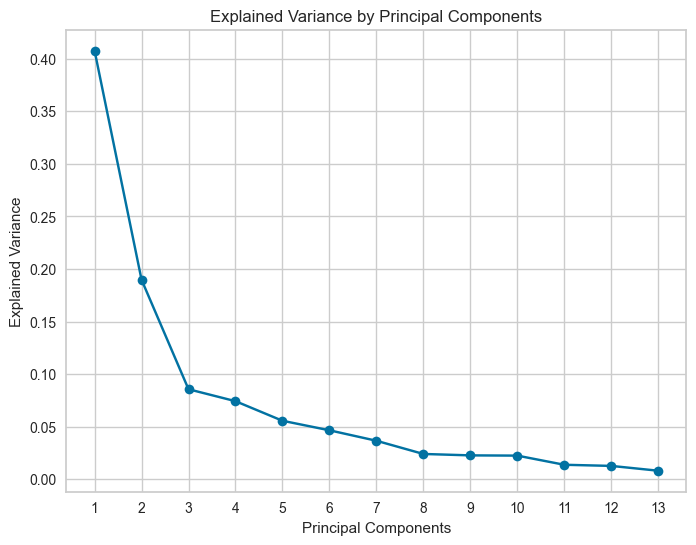

In [30]:
##Your Code start here
df2 = Datapoint.copy()

# Assuming you have your data saved in a pandas DataFrame called 'df'

# Step 1: Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df2)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvectors based on their corresponding eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the top k eigenvectors to form the principal components
num_principal_components = 3 
principal_components = sorted_eigenvectors[:, :num_principal_components]

# Step 6: Transform the original data onto the new feature subspace defined by the selected k eigenvectors
reduced_data2 = np.dot(scaled_data, principal_components)

# Convert reduced_data to DataFrame for further analysis if needed
reduced_df2 = pd.DataFrame(reduced_data2, columns=[f'PC{i+1}' for i in range(num_principal_components)])

# Plot explained variance by each component
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

##Your Code ends here

I guess n=3 is best option here again

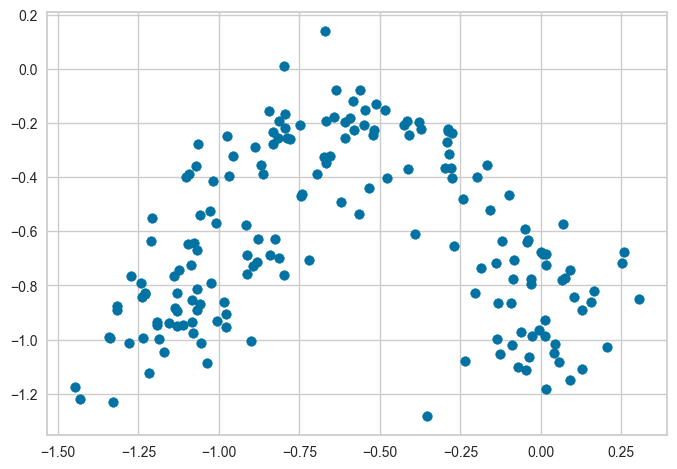

In [31]:
reduced_array2 = reduced_df2.values
plt.scatter(reduced_array2[:,0],reduced_array2[:,1])

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

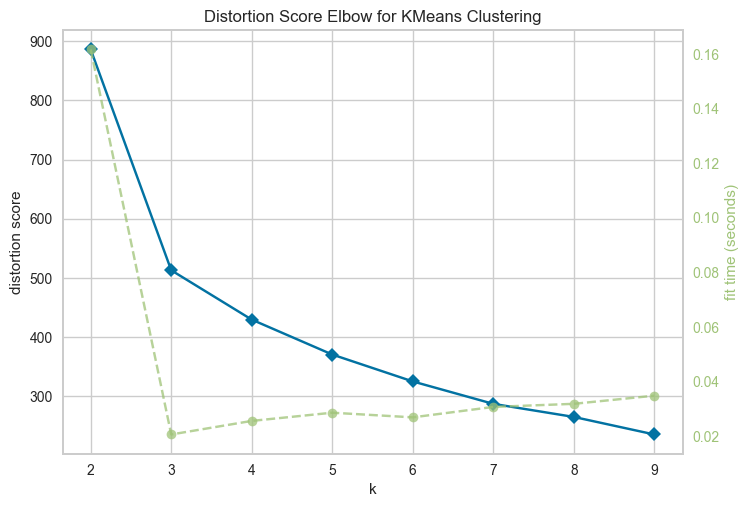

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
##Your Code start here

pca_std_datapoint1 = reduced_array1

pca_std_datapoint_minmax = reduced_array2
model = KMeans(n_init=10)
visualizer =KElbowVisualizer(model,k=(2,10),locate_elbow = False)

visualizer.fit(pca_std_datapoint1)
visualizer.show()

##Your Code ends here

3 is good number for our cluster number

What is inertia and silhouette metrics?
Explain them briefly.

### Interia :
 Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.


### silhouette :

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

In [33]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint1)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 25.31it/s]


In [34]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint1)
    silhouette[i] = sil(pca_std_datapoint1, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 27.77it/s]


Plot the **inertia** and  **silhouette** values

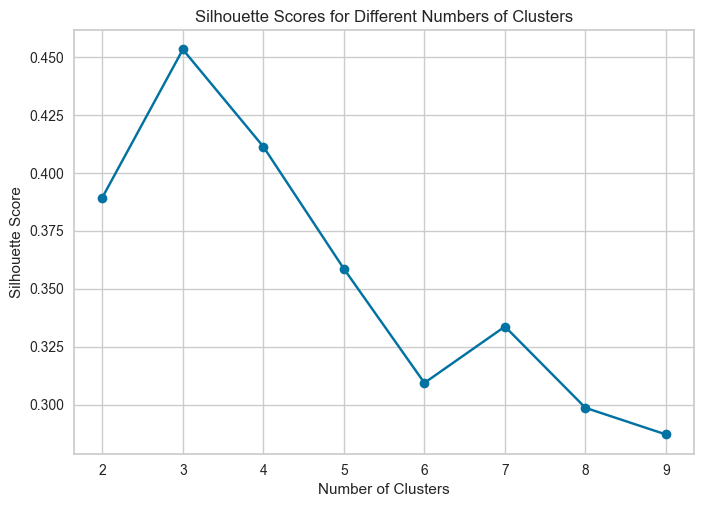

In [35]:
##Your Code start here
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()
##Your Code ends here

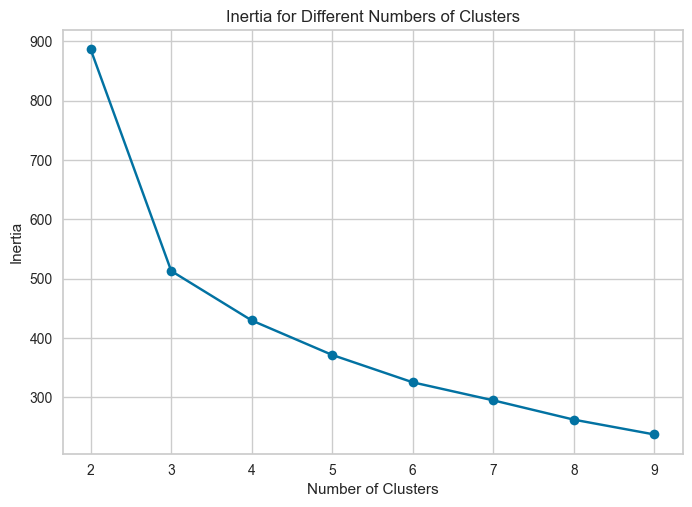

In [36]:
plt.plot(list(silhouette.keys()),inertia, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

Tune the hyper parameters based on your conclusions.

In [37]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint1)


c:\Users\PC-IranMehr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Now plot the datapoints usig two first features
(Each cluster in a different colour)

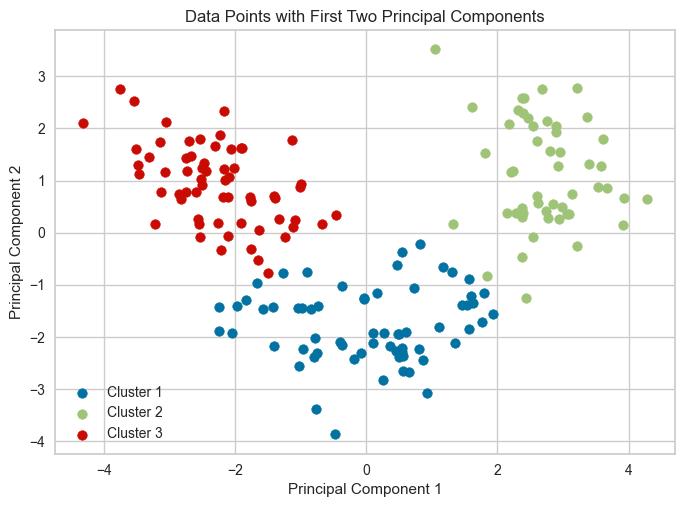

In [38]:
# Loop through unique cluster labels
for cluster_label in np.unique(y_predict_kmeans1):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint1[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}')

plt.title('Data Points with First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Do all previous steps for MinMax scaled data points.





In [39]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint_minmax)
    inertia.append(kmeans.inertia_)
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint_minmax)
    silhouette[i] = sil(pca_std_datapoint_minmax, kmeans.labels_, metric='euclidean')
    

100%|██████████| 8/8 [00:00<00:00, 26.06it/s]


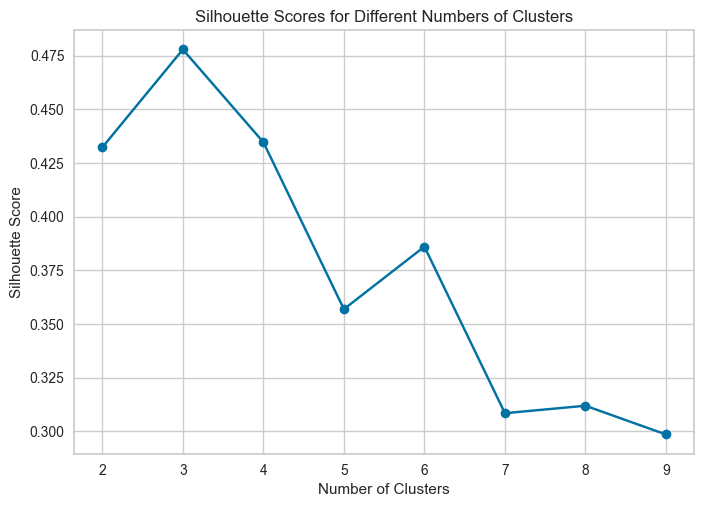

In [40]:
##Your Code start here
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()
##Your Code ends here

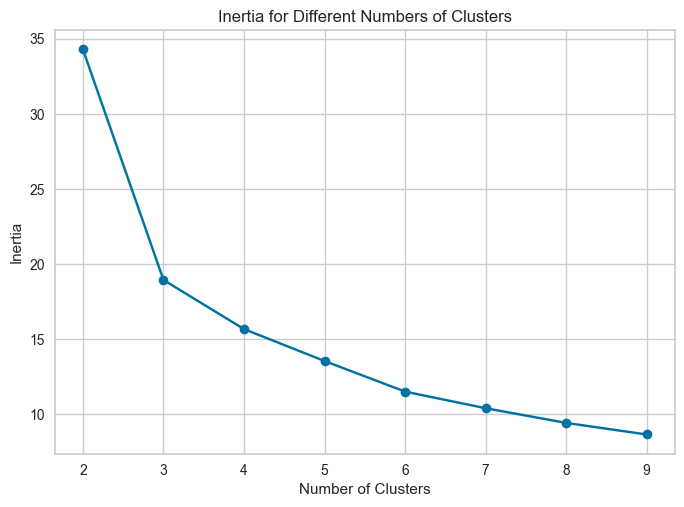

In [41]:
plt.plot(list(silhouette.keys()),inertia, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()

c:\Users\PC-IranMehr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


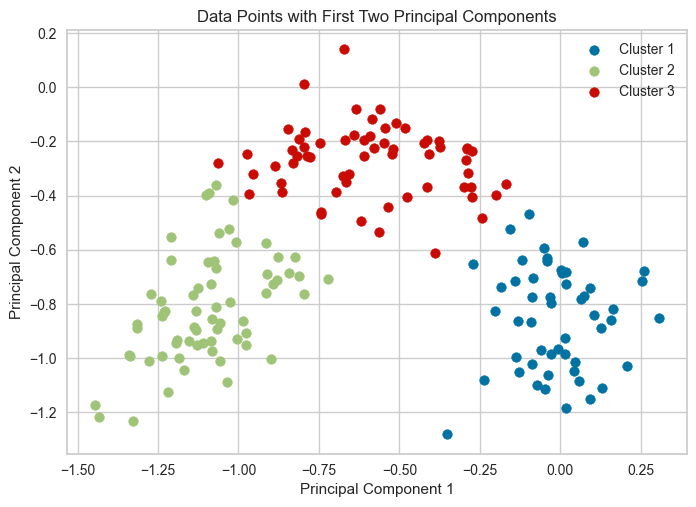

In [42]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint_minmax)
# Loop through unique cluster labels
for cluster_label in np.unique(y_predict_kmeans1):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint_minmax[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}')

plt.title('Data Points with First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Compare the results of different scaling methods in a PCA problem

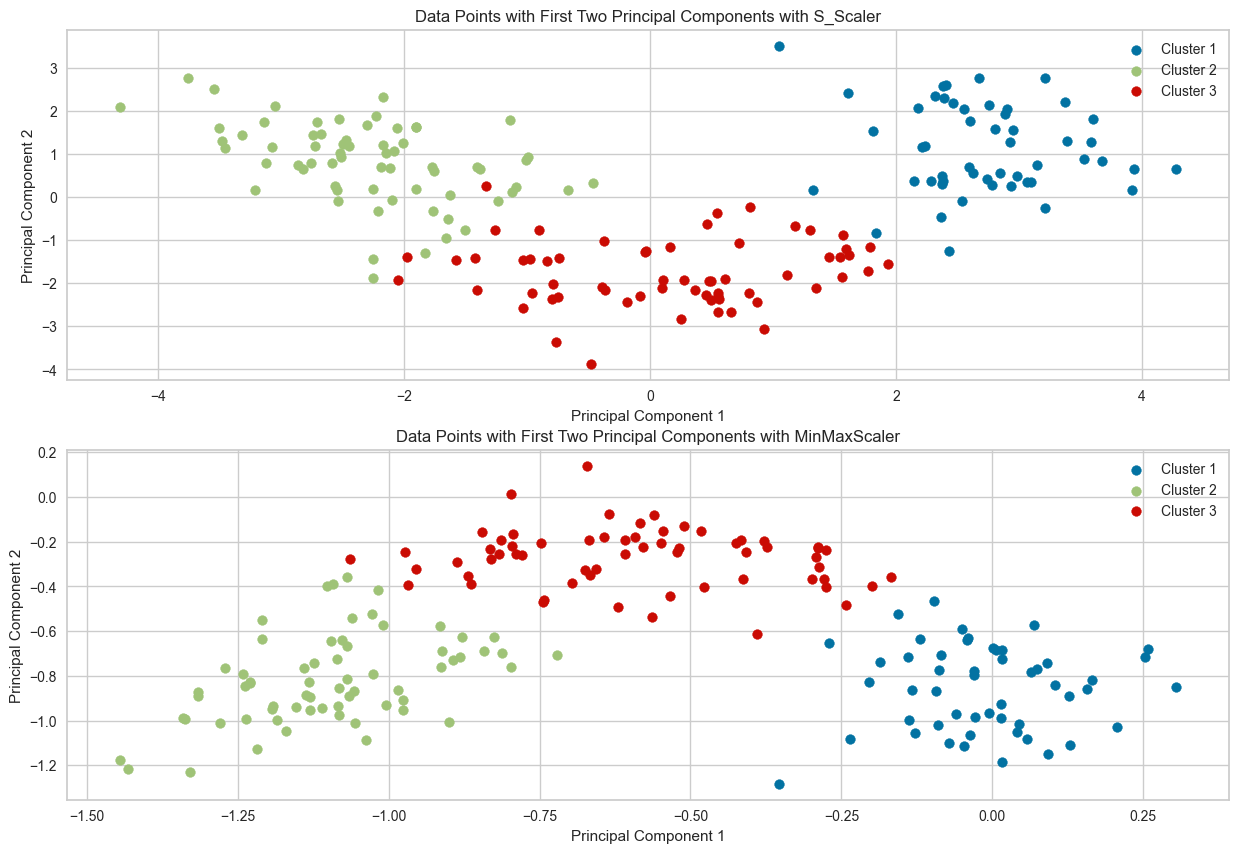

In [43]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
# Loop through unique cluster labels
for cluster_label in np.unique(y_predict_kmeans1):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint1[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}')

plt.title('Data Points with First Two Principal Components with S_Scaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)


plt.subplot(2,1,2)
# Loop through unique cluster labels
for cluster_label in np.unique(y_predict_kmeans1):
    # Extract data points belonging to the current cluster
    cluster_data = pca_std_datapoint_minmax[y_predict_kmeans1 == cluster_label]
    
    # Plot the data points for the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label+1}')

plt.title('Data Points with First Two Principal Components with MinMaxScaler')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

First recognizing diffrence is range of values in this two method. MinMaxScaler have range of [-1,1] but other method just set mean of data to zero (uses Gaussian disturbion)

$z = \dfrac{x-\mu}{\sigma}$

The choice between MinMaxScaler and StandardScaler can impact the performance of clustering algorithms. Some algorithms may perform better with data that is scaled to a specific range (e.g., [0, 1]), while others may perform better with data that is standardized (mean = 0, standard deviation = 1).